In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
# matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.io import fits

In [3]:
fitspath = '../8595_6101/manga-8595-6101-LOGCUBE.fits'
# fits_image_filename = fits.util.get_testdata_filepath(fitspath)
hdu_list = fits.open(fitspath)

In [4]:
hdu_list.info()

Filename: ../8595_6101/manga-8595-6101-LOGCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (54, 54, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (54, 54, 4563)   float32   
  3  MASK          1 ImageHDU        17   (54, 54, 4563)   int32   
  4  DISP          1 ImageHDU        11   (54, 54, 4563)   float32   
  5  PREDISP       1 ImageHDU        11   (54, 54, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   9R x 65C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 

In [5]:
image_data = hdu_list[1].data

In [6]:
allflux = hdu_list["FLUX"].data
allwave = hdu_list["WAVE"].data
oneposflux = []
oneposflux_std = []
for i in range(0,len(allflux)):
    oneposflux.append(np.mean(allflux[i,:,:]))
    oneposflux_std.append(np.std(allflux[i,:,:])) 

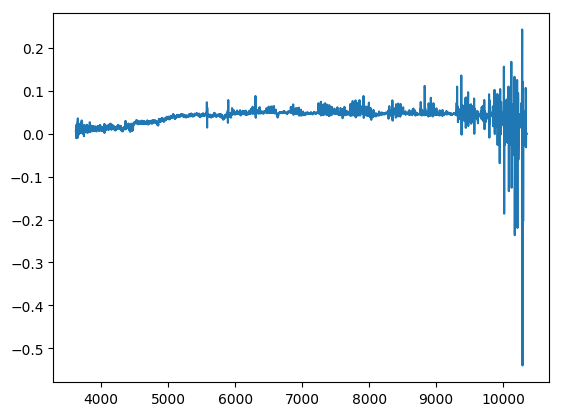

In [7]:
# plt.errorbar(allwave,oneposflux,yerr=oneposflux_std,fmt='o',ecolor='r',color='b',elinewidth=0.1,capsize=0.1)#
plt.plot(allwave,oneposflux)

In [8]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4563, 54, 54)


Min: -2.5404074
Max: 1.653501
Mean: 0.03708027
Stdev: 0.099779904


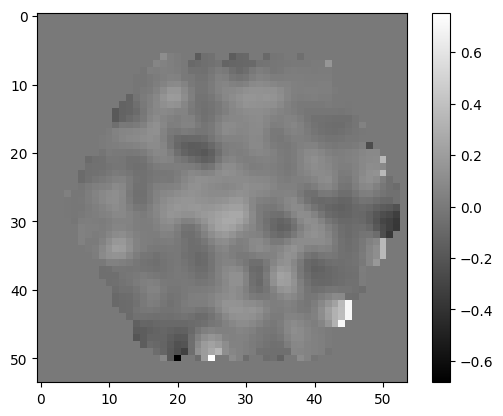

In [9]:
plt.imshow(image_data[2], cmap='gray')
plt.colorbar()
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

<class 'numpy.ndarray'>


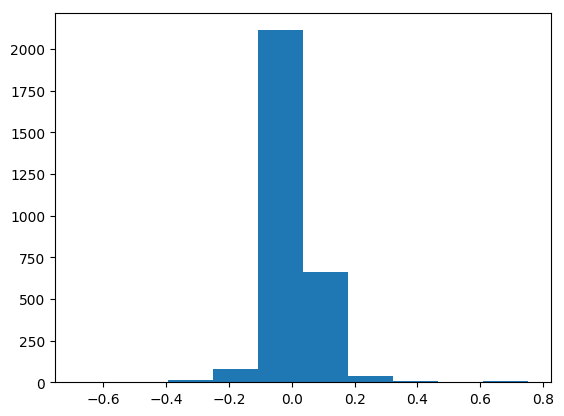

In [10]:
flat = image_data[2].flatten()
print(type(flat))
NBINS = 10
histogram = plt.hist(flat, NBINS)

In [11]:
# from matplotlib.colors import LogNorm
# plt.imshow(image_data[2], cmap='gray', norm=LogNorm())
# # I chose the tick marks based on the histogram above
# cbar = plt.colorbar()#ticks=[-0.2,0,0.2]
# # cbar.ax.set_yticklabels(['-0.2','0','0.2'])

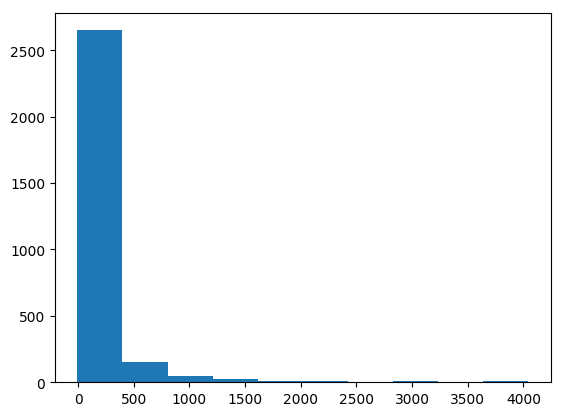

In [12]:
final_image = np.zeros(shape=image_data[2].shape)
for img in image_data:
    final_image += img
image_hist = plt.hist(final_image.flatten(), 10)

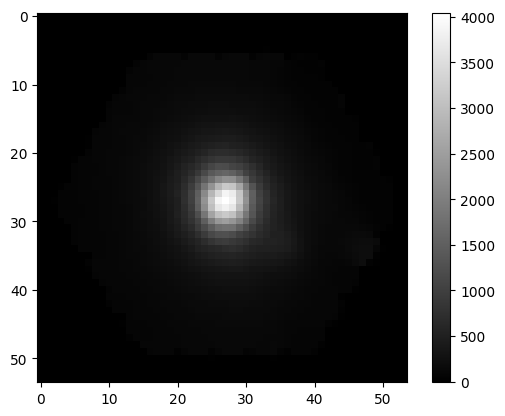

In [13]:
plt.imshow(final_image, cmap='gray')#, vmin=2.e3, vmax=3.e3
plt.colorbar()

In [ ]:
# outfile = 'stacked.fits'
# hdu = fits.PrimaryHDU(final_image)
# hdu.writeto(outfile, clobber=True)